<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Univariate Analysis - High Potentials

- Im Folgenden werden höherwertige und vorhandene als relevant betrachtete Attribute visualisiert, dabei werden die Diagramme je für High Potentials und die Normal Potentials erstellt.


- Neben der Aufgabenstellung, warum die High Potentials das Unternehmen verlassen, soll durch die Visualisierungen festgestellt werden, **ob die High Potentials überhaupt das Unternehmen verlassen.**


### Initializations


In [3]:
# Bibliotheken einbinden
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [5]:
df = pd.read_pickle('exchange/hr_01_enriched_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
satisfactionLevel                  10000 non-null float64
yearsSinceEvaluation               10000 non-null float64
numberOfProjects                   10000 non-null int64
averageMonthlyHours                10000 non-null int64
yearsAtCompany                     10000 non-null int64
workAccident                       10000 non-null category
hasLeftCompany                     10000 non-null category
gotPromotion                       10000 non-null category
department                         10000 non-null category
salary                             10000 non-null category
projectsPerYear                    10000 non-null float64
hoursPerProject                    10000 non-null float64
satisfactionHours                  10000 non-null float64
workingHoursSinceLastEvaluation    10000 non-null float64
evaluationSatisfaction             10000 non-null float64
projectsPerWorkingHour 

### Comparison of High Potentials and Normal Employees

Die Standardanalysewerten der Attribute werden im Folgenden berechnet und mittels einer Tabelle ausgegeben. Dies wird zum einen für die zuvor definierten High Potentials sowie für die restlichen Mitarbeiter dargestellt. 

In [6]:
# High Potentials
df_high = df[df['valuableEmployee']==1]
df_high.describe()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,projectsPerWorkingHour,valuableEmployee
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.0
mean,0.750890,0.726717,4.510676,179.223310,2.461744,1.949173,1211.834926,134.849822,1564.881246,0.545782,0.003147,1.0
std,0.142076,0.159394,0.662487,30.212647,0.864536,0.423735,691.552829,35.431606,441.412864,0.159094,0.001158,0.0
min,0.510000,0.370000,2.000000,98.000000,2.000000,0.285714,428.000000,49.980000,493.920000,0.197600,0.001123,1.0
25%,0.630000,0.590000,4.000000,156.000000,2.000000,1.666667,934.800000,106.820000,1224.000000,0.431600,0.002334,1.0
50%,0.740000,0.730000,5.000000,179.000000,2.000000,2.000000,1092.000000,131.520000,1522.260000,0.528000,0.002949,1.0
75%,0.870000,0.870000,5.000000,205.000000,3.000000,2.000000,1308.000000,160.020000,1881.600000,0.646000,0.003707,1.0
max,1.000000,1.000000,7.000000,229.000000,10.000000,3.500000,7400.000000,229.000000,2684.880000,0.970200,0.011338,1.0


In [7]:
# Normal Employees
df_normal = df[df['valuableEmployee']==0]
df_normal.describe()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,projectsPerYear,hoursPerProject,satisfactionHours,workingHoursSinceLastEvaluation,evaluationSatisfaction,projectsPerWorkingHour,valuableEmployee
count,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.0
mean,0.593515,0.715864,3.710793,203.406377,3.612551,1.123716,2497.183966,120.987598,1786.417084,0.429871,0.002312,0.0
std,0.253875,0.172883,1.261013,51.402392,1.456469,0.449442,1212.386012,63.939389,713.683377,0.228916,0.001048,0.0
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.200000,436.000000,13.200000,448.440000,0.046800,0.000608,0.0
25%,0.410000,0.560000,3.000000,156.000000,3.000000,0.750000,1737.450000,61.200000,1175.220000,0.220000,0.001683,0.0
50%,0.620000,0.720000,4.000000,205.000000,3.000000,1.000000,2304.000000,120.070000,1708.800000,0.428800,0.002118,0.0
75%,0.810000,0.870000,4.000000,249.000000,4.000000,1.500000,2856.000000,172.380000,2377.800000,0.608000,0.002624,0.0
max,1.000000,1.000000,7.000000,310.000000,10.000000,3.000000,13500.000000,282.440000,3608.400000,0.990000,0.012531,0.0


### Histograms of Number Attributes




Wie zuvor in den vorhergehenden Notebooks wird die Verteilung der stetigen Werte mit Hilfe von Diagrammen visualisiert. Da nun die wertvollen Mitarbeiter definiert sind und die Werte für sie in Abgrenzung zu den restlichen Mitarbeitern vorliegen, werden die beiden Gruppen im Vergleich dargestellt. 

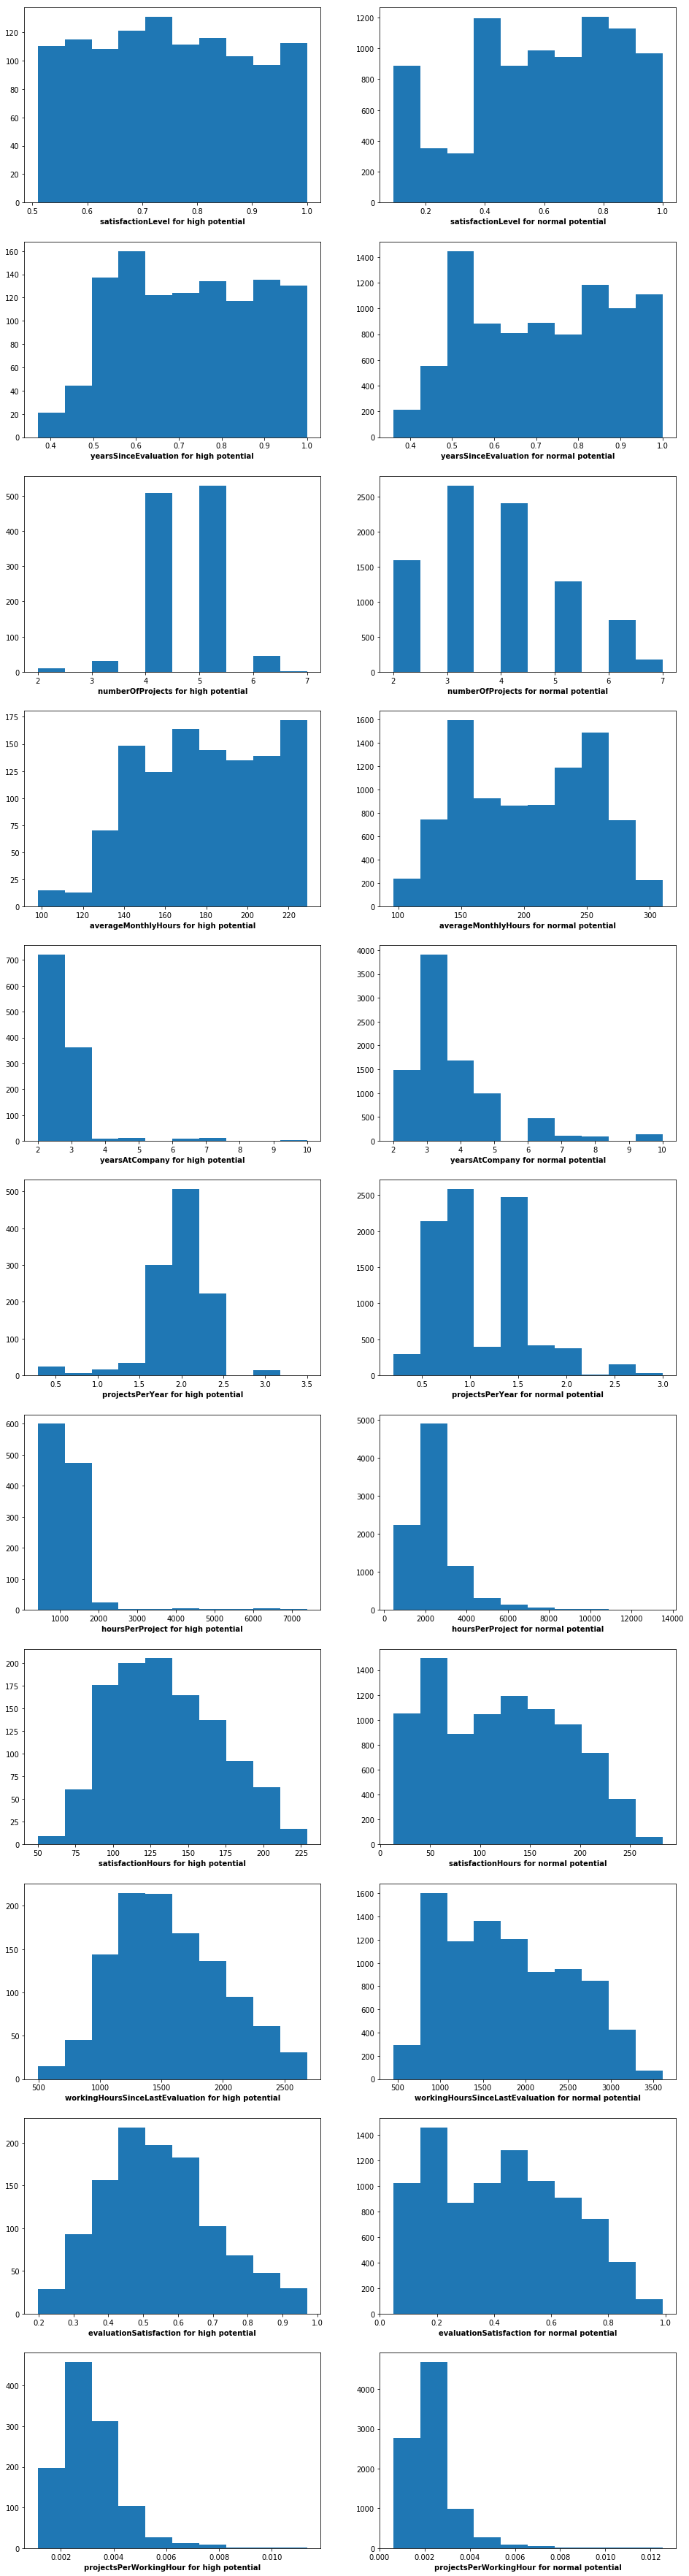

In [8]:
# Visualisierung der Häufigkeitsverteilung der Attribute mit Zahlenwerten
count_number_colums = df.select_dtypes(include=[np.number]).drop('valuableEmployee', axis=1).columns.size
f, a = plt.subplots(count_number_colums, 2, figsize=(16,64))
a = a.ravel()
for idx, col in enumerate(df.drop('valuableEmployee', axis=1).select_dtypes(include=[np.number])):
    a[idx*2].hist(df_high[col])
    a[idx*2].set_xlabel(col + ' for high potential', weight='bold')
    a[idx*2+1].hist(df_normal[col])
    a[idx*2+1].set_xlabel(col + ' for normal potential', weight='bold')

#### Fazit Histogramme
Relevante Erkenntnisse und Anmerkungen werden hervorgehoben:


- **`satisfactionLevel`**: Die 1.124 High Potentials verteilen sich fast gleichmäßig zwischen 0,5 und 1,0.


- **`numberOfProjects`**: Der Großteil der High Potentials hat bereits vier oder fünf Projekte absolviert.


- **`averageMonthlyHours`**: An dieser Stelle fehlen die Daten, um die High Potentials mit wenigen Wochenstunden genau zu analysieren. Die Projektergebnisse müssten dabei betrachtet werden, um zu überprüfen, warum die Projektwiederholungsrate so hoch ist. Durch diese Vorgehensweise könnte die Berechnungslogik überprüft werden.


- **`hoursPerProject`**: Bei den Stunden je Projekt heben die High Potentials sich deutlich von den Normals ab.


- **`workingHoursSinceLastEvaluation`**: Die High Potentials werden bezogen auf die Stunden seit der letzten Evaluation häufiger evaluiert. 


### Countplots of Category Attributes



Auch die kategorialen Werte werden im Vergleich veranschaulicht, um weitere Erkenntnisse bezüglich der wertvollen Mitarbeiter zu erhalten. 

C:\Users\Lukas.Oldach\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


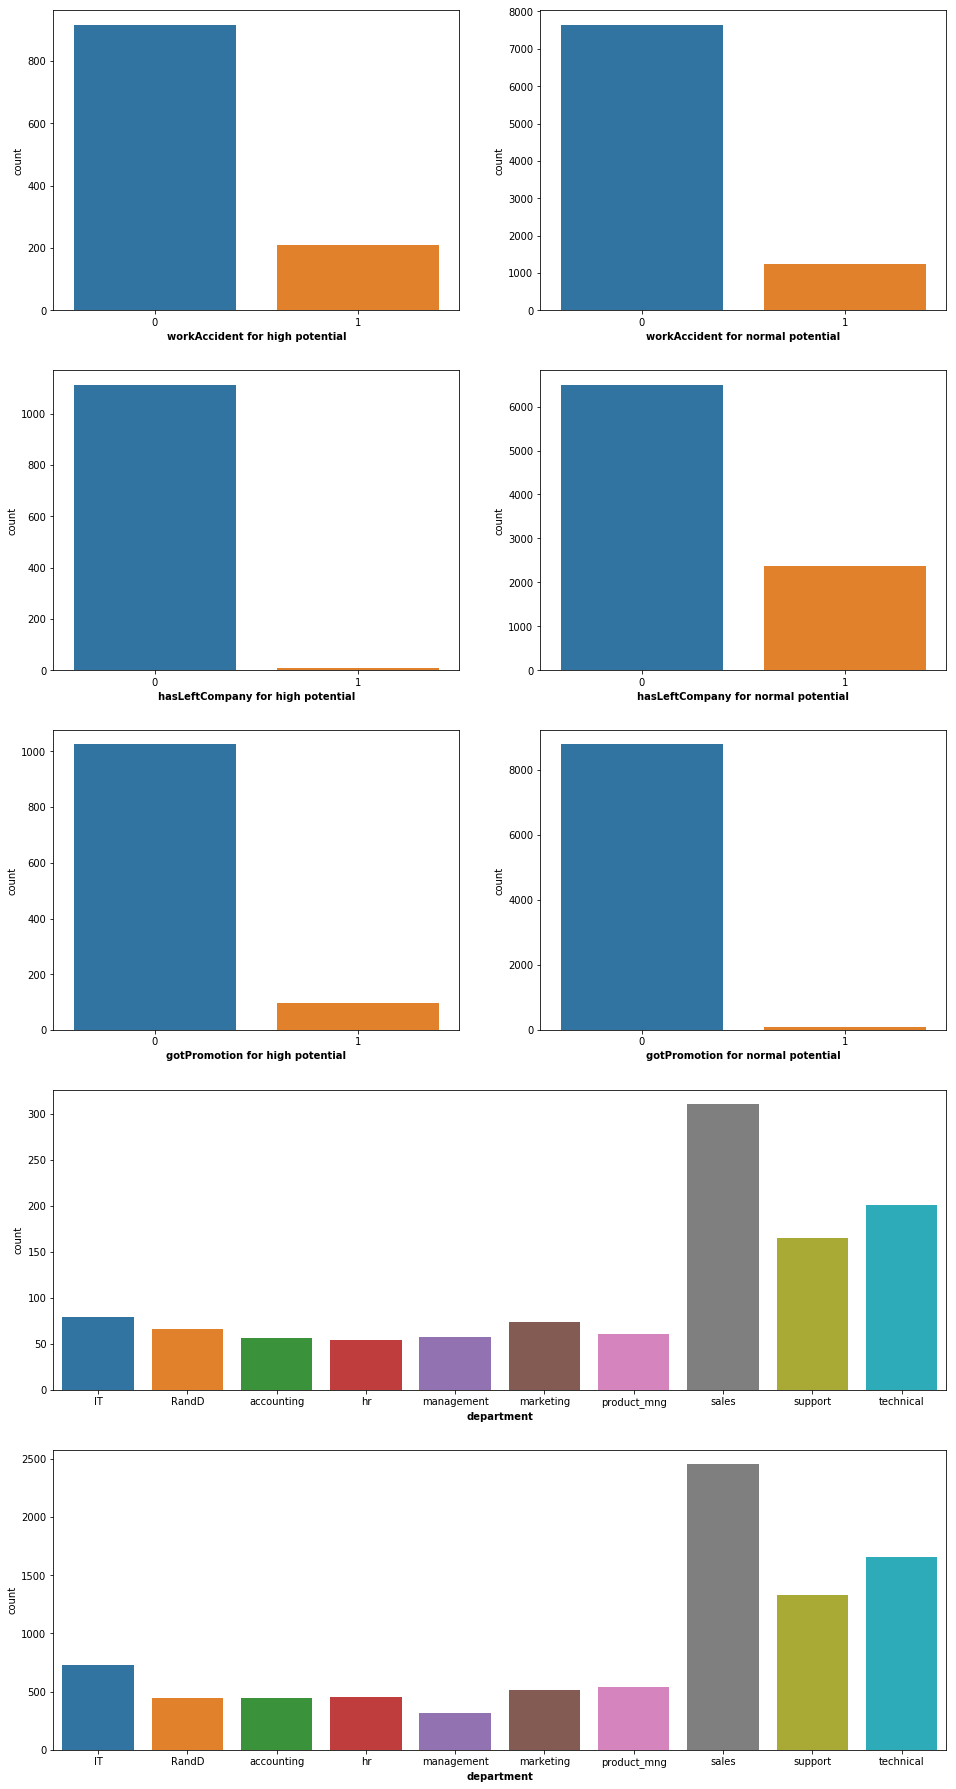

In [12]:
# Visualisierung der Häufigkeitsverteilung der Attribute mit Categories
count_number_colums = df.select_dtypes(include=['category']).columns.size
f, a = plt.subplots(count_number_colums, 2, figsize=(16,32))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=['category']).drop(['department'], axis=1)):
    sns.countplot(x=col, data=df_high, ax=a[idx*2])
    a[idx*2].set_xlabel(col + ' for high potential', weight='bold')
    sns.countplot(x=col, data=df_normal, ax=a[idx*2+1])
    a[idx*2+1].set_xlabel(col + ' for normal potential', weight='bold')
a = plt.subplot2grid((5, 2), (3, 0), colspan=2)
a.set_xlabel(col + ' for high potential', weight='bold')
sns.countplot(x='department', data=df_high, ax=a)
a = plt.subplot2grid((5, 2), (4, 0), colspan=2)
a.set_xlabel(col  + ' for normal potential', weight='bold')
sns.countplot(x='department', data=df_normal, ax=a);

#### Fazit


- **`workAccident`**: Relativ betrachtet neigen die High Potentials mit 18,5 % im Vergleich zu 13,8 % eher zu einem Arbeitsunfall.


- **`hasLeftCompany`**: Bezogen auf die Aufgabenstellung ist dieses Ergebnis höchst interessant, **da die High Potentials nicht dazu neigen, das Unternehmen zu verlassen!** Von den High Potentials haben lediglich zehn Personen das Unternehmen verlassen.


- **`gotPromotion`**: Von den Normals wurden 97 (ca.1,1 %) und bei den High Potentials wurden 99 (ca. 9 %) befördert. 


- **`department`**: Nur beim Management ist eine leichte Abweichung hinsichtlich der High Potentials zu erkennen. 

### Next Steps 2X Modelling

Mit diesem Notebook wird die Visualisierung des gegebenen Datensatzes abgeschlossen. Nun wird mit der Modellierung begonnen, um ein möglichst genaues Modell zu generieren, welches vorhersagt, ob ein Mitarbeiter kündigen wird oder zunächst beim Unternehmen bleiben wird.